<a href="https://colab.research.google.com/github/ronit1996/Machine-Learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
import numpy as np

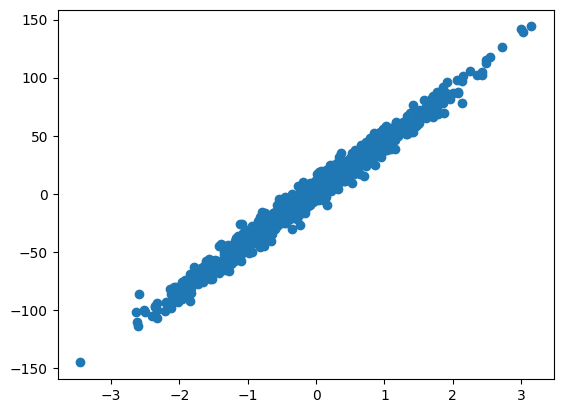

In [56]:
X,y = make_regression(n_samples=1000, n_features=1, bias=3, noise=6)
pyplot.scatter(X,y)
pyplot.show()

In [57]:
# Process the data and create lists #
x_data = []
y_data = []
for i in X.tolist():
  x_data.append(i[0])

for i in y:
  y_data.append(i)

In [58]:
# create the prediction function #
def pred(w,x,b):
  return w * x + b

In [59]:
# create the w derivative function #
def dif_w(x_arr, y_arr, w, b):
  sum = 0
  for (x, y) in zip(x_arr, y_arr):
    sum = sum + ( (pred(w, x, b) - y) * x)
  return sum

In [62]:
# create the b derivative function #
def dif_b(x_arr, y_arr, w, b):
  sum = 0
  for (x, y) in zip(x_arr, y_arr):
    sum = sum + (pred(w, x, b) - y)
  return sum

In [66]:
# create the cost function to check during gradient descent #
def cost(w, b, x_arr, y_arr,m):
  sum = 0
  for (x,y) in zip(x_arr, y_arr):
    sum = sum + ((pred(w,x,b) - y)**2)
  return sum/2*m

In [71]:
# create gradient descent #
epochs = 1000
w = 0
b = 0
step_rate = 0.01
count = 0
m = len(x_data)
w_data = []
b_data = []
cost_data = []

while count <= 1000:
  temp_w = w - (step_rate*dif_w(x_data, y_data, w, b)/m)
  temp_b = b - (step_rate*dif_b(x_data, y_data,w , b)/m)
  w = temp_w
  b = temp_b
  cost_data.append(cost(w,b,x_data,y_data,m))
  w_data.append(w)
  b_data.append(b)
  count = count + 1

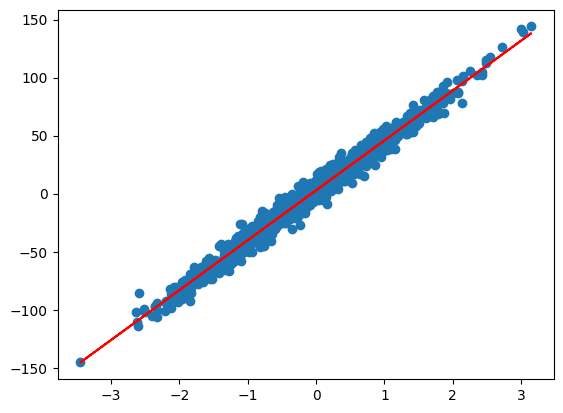

In [100]:
# making prediction and creating the prediction line #
y_pred = w * np.array(x_data) + b
pyplot.scatter(x_data, y_data)
pyplot.plot(x_data, y_pred, color='red')
pyplot.show()

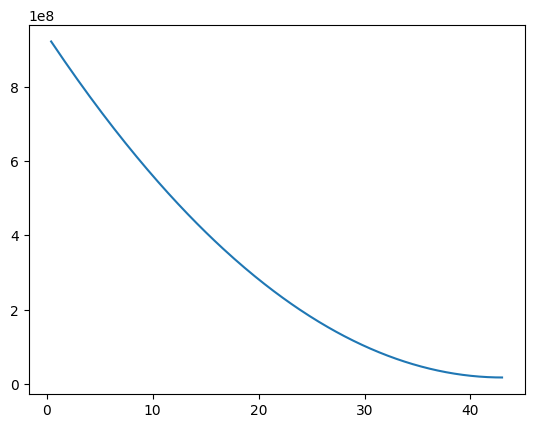

In [103]:
# create the plot of the cost function with w as input #
pyplot.plot(w_data, cost_data)
pyplot.show()

Text(0.5, 0.92, 'surface')

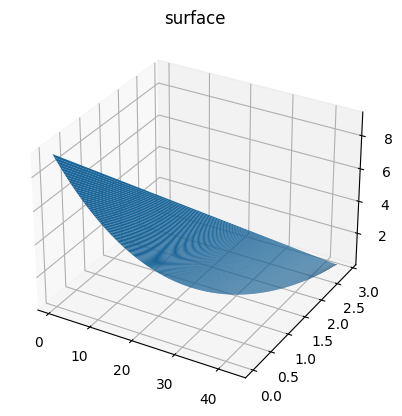

In [115]:
# create a 3d plot of cost function with the input of w and b #
fig = pyplot.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_trisurf(w_data, b_data, cost_data, linewidth=0.2, antialiased=True)
ax.set_title('surface')